결정 트리

로지스틱 회귀로 와인 분류하기

In [2]:
import pandas as pd
import numpy as np 

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
# class 는 타깃 값으로 0이면 레드와인 1이면 화이트 와인

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
#  총 6497개 샘플 4개 열은 모두 실수값,
# Non_null count가 모두 6497 >> 누락된 값 없음

# 누락된 값이 있다면 그 데이터를 버리거나 평균값으로 채운 후 사용 가능.

In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
# 특성을 표준화 해야함.

wine_data = wine[['alcohol','sugar','pH']].to_numpy()
wine_target = wine[['class']].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(wine_data, wine_target, test_size=0.2, random_state=42)

print(train_input.shape, test_input.shape)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

(5197, 3) (1300, 3)


In [7]:
# 표준화된 세트를 로지스틱 회귀 모델로 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 점수가 둘 다 낮음 > 과소적합된 것 같음

0.7808350971714451
0.7776923076923077


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 과소적합 문제를 해결하기 위해 
# 규제 매개변수 C값 변경 또는 slover 매개변수에서 다른 알고리즘 선택

In [8]:
# 로지스틱 회귀 모델이 학습한 계수와 절편
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


결정 트리 (Decision Tree)

In [11]:
# 결정트리 >> 이유를 설명하기 쉬운 모델

# 스무고개와 같이 질문을 하나씩 던져서 정답을 맞춰감
# 데이터를 잘 나눌수 있는 질문을 찾는다면 계속 질문을 추가해서 분류 정확도를 높일 수 있음.

# 사이킷런의 DecisionTreeClassifier 클래스를 사용해 결정트리 모델 훈련.

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 훈련 세트는 점수가 높고 테스트 세트는 점수가 낮음 >> 과대적합된 모델

0.996921300750433
0.8592307692307692


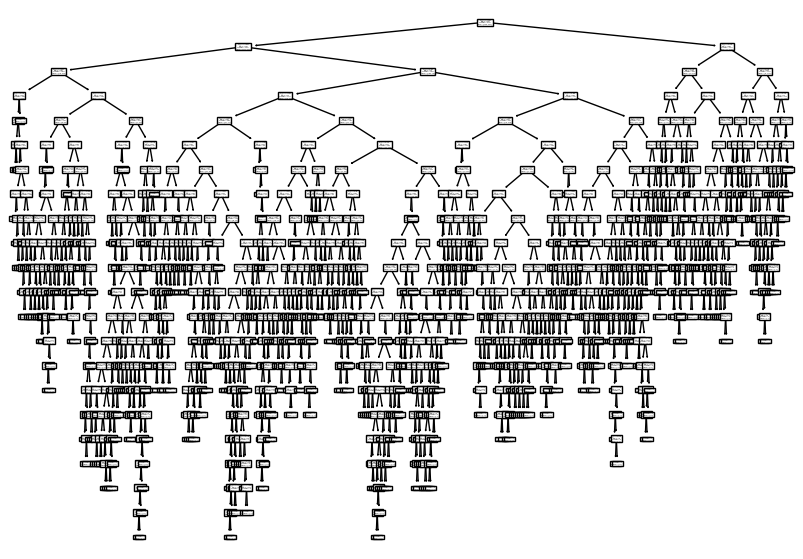

In [12]:
# 그림으로 표현하기
# 사이킷런의 plot_tree() 함수를 사용

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [ ]:
# 진짜 나무는 밑에서부터 위로 자라지만 결정 트리는 위에서 아래로 자람
# 위쪽이 루트노드(root node)
# 아래쪽이 리프 노드(leaf node)


# 노드 == 결정트리를 구성하는 핵심 요소, 훈련 데이터의 특성에 대한 테스트를 표현.
#  ex) 현재 샘플의 당도가  -0.239보다 작거나 같은지 테스트
#  >> 가지branch는 테스트 결과(True, False)를 나타내며 일반적으로 하나의 노드는 2개의 가지를 가짐.

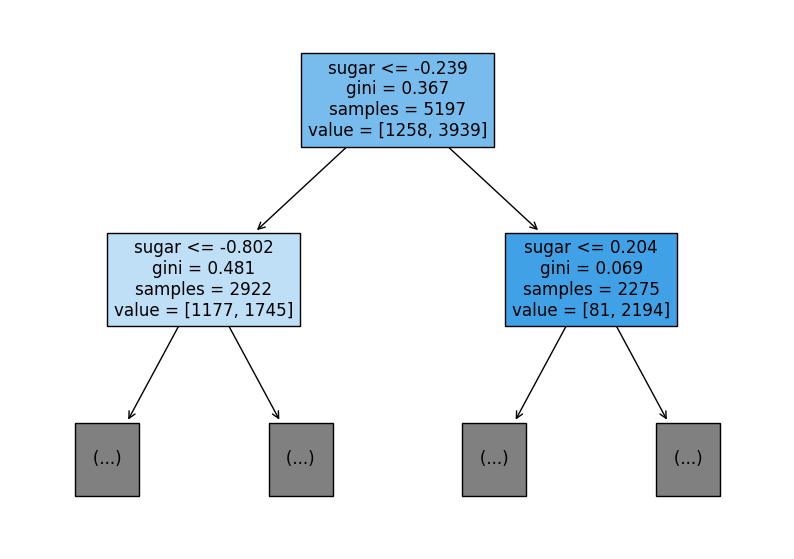

In [13]:
# plot_tree() 함수에서 트리 깊이 제한하여 출력 
# max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를더 확장하여 그림.
# filled 매개변수에서 클래스에 맞게 노드의 색을 칠할 수 있음.
# feature_names 매개변수는 특성의 이름을 전달할 수 있음.

plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
# 루트 노드 : 당도(sugar) <= -0.239 인지 질문/ 루프 노드의 총 샘플 수 5197
#  value = 음성클래스(레드와인) 1258, 양성클래스(화이트와인) 3939
# 노드 컬러 == 어떤 클래스의 비율이 높아지면 색이 점점 진해짐.

# 리프 노드에서 가장 많은 클래스가 예측 클래스가 됨.
# 만약 여기서 성장을 멈춘다면 둘 다 양성의 수가 더 많기 때문에 양성 클래스로 예측하여 나옴.

# 결정 트리를 회귀 문제에 적용하면 리프 노드에 도달한 샘플의 타깃을 평균하여 예측값 사용.
# DcisionTreeRegression

In [ ]:
# 노드 상자 안의 gini

# # 지니 불순도(gini impurity) : 
#  DecisionTreeClassifier 클래스의 criterion 매개 변수의 기본값이 gini
#  creterion 매개변수의 용도 == 노드에서 데이터를 분할할 기준을 정함.

#  첫 번째 루트 노드에서 당도 -0.239기준으로 나눌 때. criterion 매개변수에 지정한 gini 불순도 사용

#  지니 불순도 계산하는 방법

#  지니 불순도 = 1 - (음성 클래스 비율**2 + 양성 클래스 비율**2)

#  노드에 하나의 클래스만 있다면 지니 불순도는 0이 됨 == 순수 노드

In [ ]:
# 결정트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킴

# 부모 노드와 자식노드의 불순도 차이 계산하는 방법
# 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더함. 그리고 부모 노드의 불순도에서 뺌.

# 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모 노드 샘플 수) x 왼쪽 노드 불순도
#             - (오른쪽 노드 샘플 수 / 부모 노드 샘플 수) x 오른쪽 노드 불순도
# = 0.367 - (2922 / 5197) x 0.481  - (2275 / 5197) x 0.069 = 0.066

# 정보 이득(information gain) : 부모와 자식 노드 사이의 불순도 차이

In [ ]:
# DecisionTreeClassfier 클래스의 criterion='entropy'

# 엔트로피 불순도
# 노드 클래스의 비율을 사용하지만 지니 불순도처럼 제곱이 아니라 밑이 2인 로그 사용해 곱함.

# - 음성 클래스 비율 x log2(음성 클래스 비율) - 양성 클래스 비율 x log2(양성 클래스 비율)
# = -(1258/5197) x log2(1258/5197) - (3939/4197) x log2(3939/5197) = 0.798

# 보통 기본값인 지니 불순도와 엔트로피 불순도가 만든 결과의 차이가 크지 않음

In [ ]:
# 불순도 기준을 사용해 정보 이득이 최대가 되도록 노드 분할
# 노드를 순수하게 나눌수록 정보 이득이 커짐
# 새로운 샘플에 대해 예측할 때 노드의 질문에 따라 트리 이동.
# 마지막에 도달한 노드의 클래스 비율을 보고 예측을 만듦

# 앞의 트리는 제한없이 자라났기 때문에 훈련 세트보다 테스트 세트에서 점수가 크게 낮았음

In [14]:
# 가지치기 == 자라날 수 있는 트리의 최대 깊이 지정
# DecisionTreeClassifier 크래스의 max_depth 매개변수 설정

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


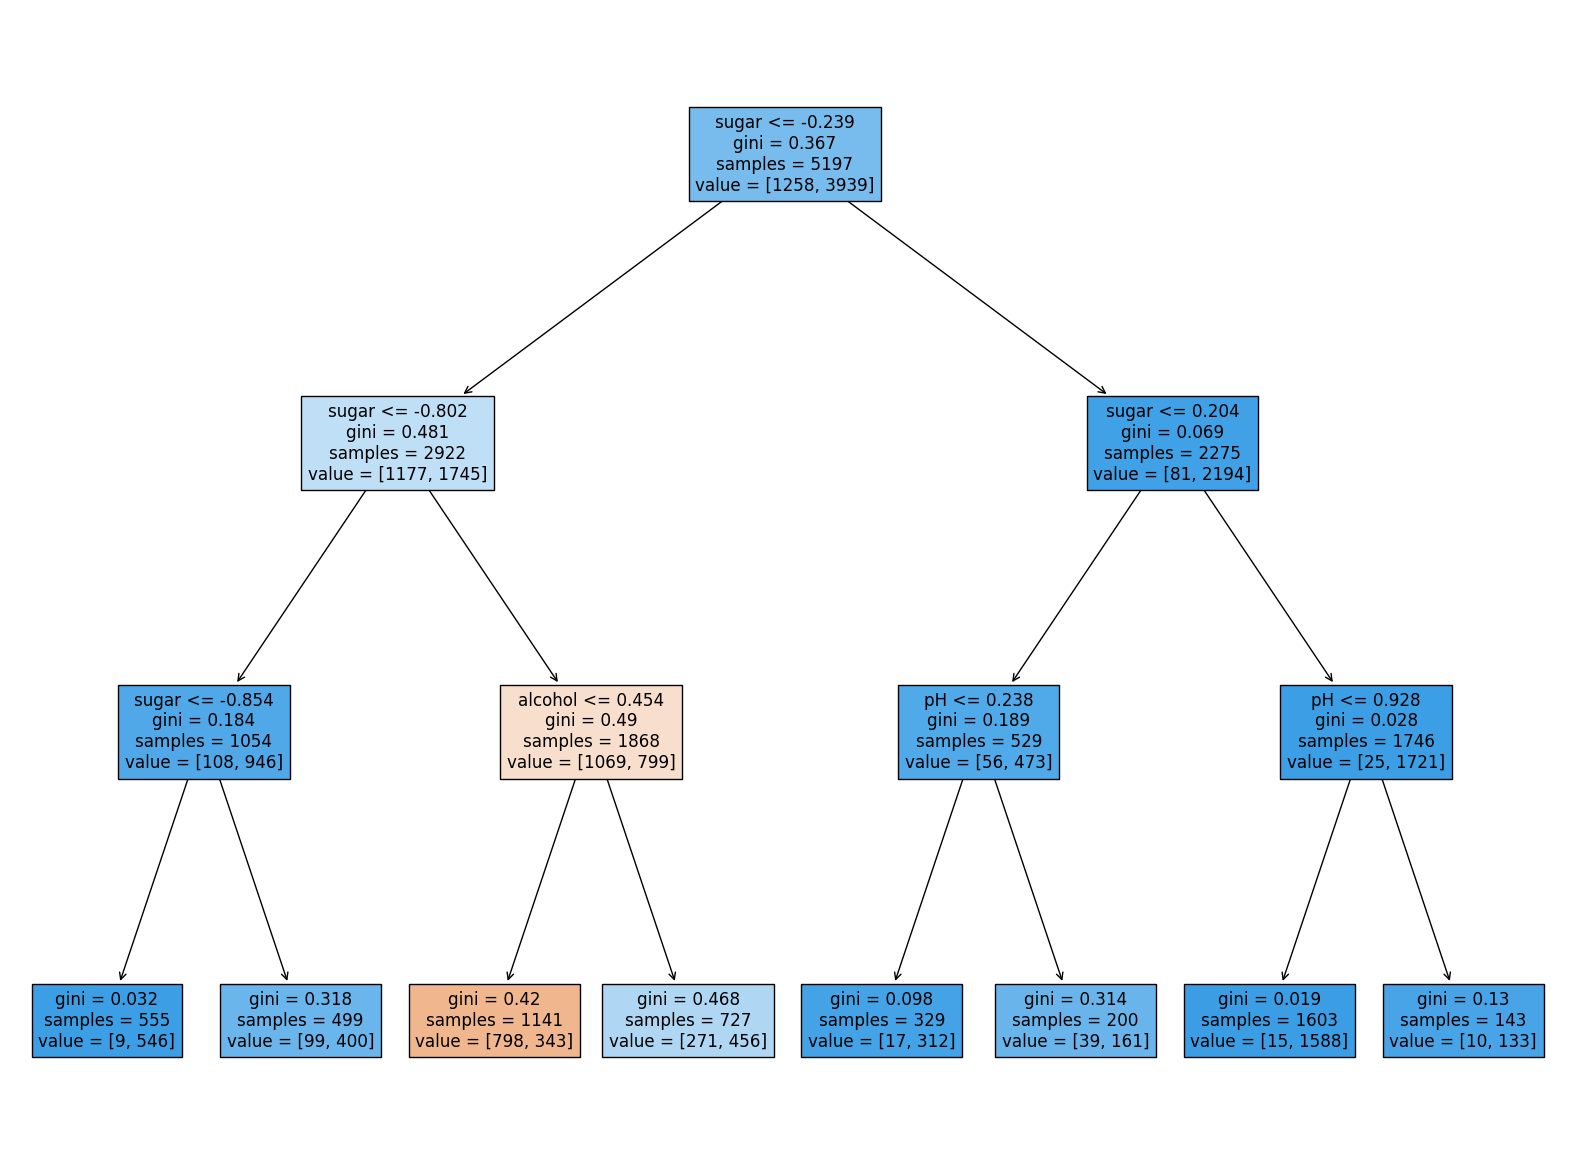

In [15]:
# 훈련세트 정확도가 낮아졌지만 둘이 비슷
# 트리 그래프 그리기

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [17]:
# 샘플을 어떤 클래스 비율로 나눌지 생각할 때 특성의 스케일이 계산에 영향을 미치지 않음
# > 표준화 전처리를 할 필요가 없음

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
# scale한 input세트와 비교해서 값이 똑같이 나옴.

0.8454877814123533
0.8415384615384616


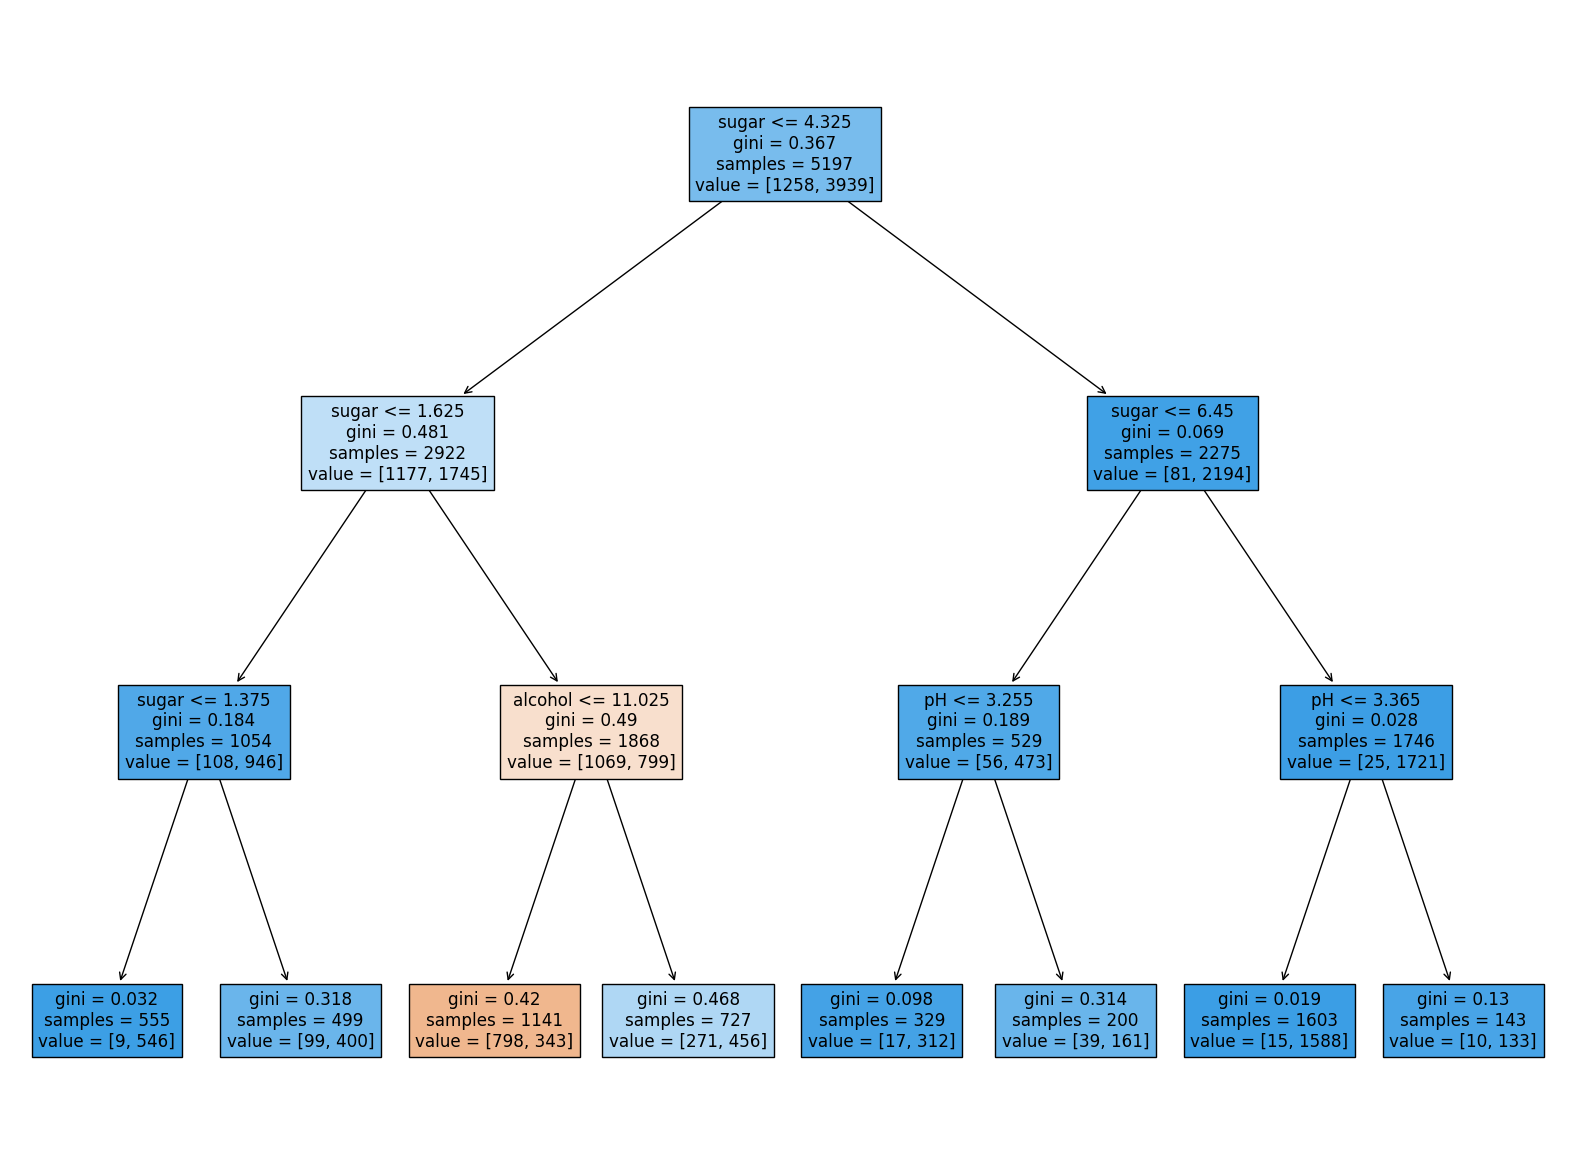

In [18]:
# 그래프 그리기 
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
# 결과는 같지만 특성값을 표준점수로 바꾸지 않아 이해하기 더 쉬움. 

In [20]:
# 결정 트리 : 어떤 특성이 가장 유용한지 나타내는 특성 중요도 계산해줌.
# 이 트리의 루트 노드와 깊이 1에서 당도를 사용함 > 당도가 가장 유용한 특성일까

# 특성 중요도 확인
print(dt.feature_importances_)
# 두번째인 당도가 특성 중요도가 가장 높음.
# 특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산

# 특성 중요도를 활용하면 결정 트리 모델의 특성 선택에 사용 가능.

[0.12345626 0.86862934 0.0079144 ]


코드 적어 보기

In [21]:
import pandas as pd
import numpy as np 
wine = pd.read_csv('http://bit.ly/wine_csv_data')

print('wine.info():', wine.info())
print('wine.describe():',wine.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
wine.info(): None
wine.describe():            alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000


In [22]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,target, test_size=0.2)


from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input, test_target))

0.9971137194535309
0.87


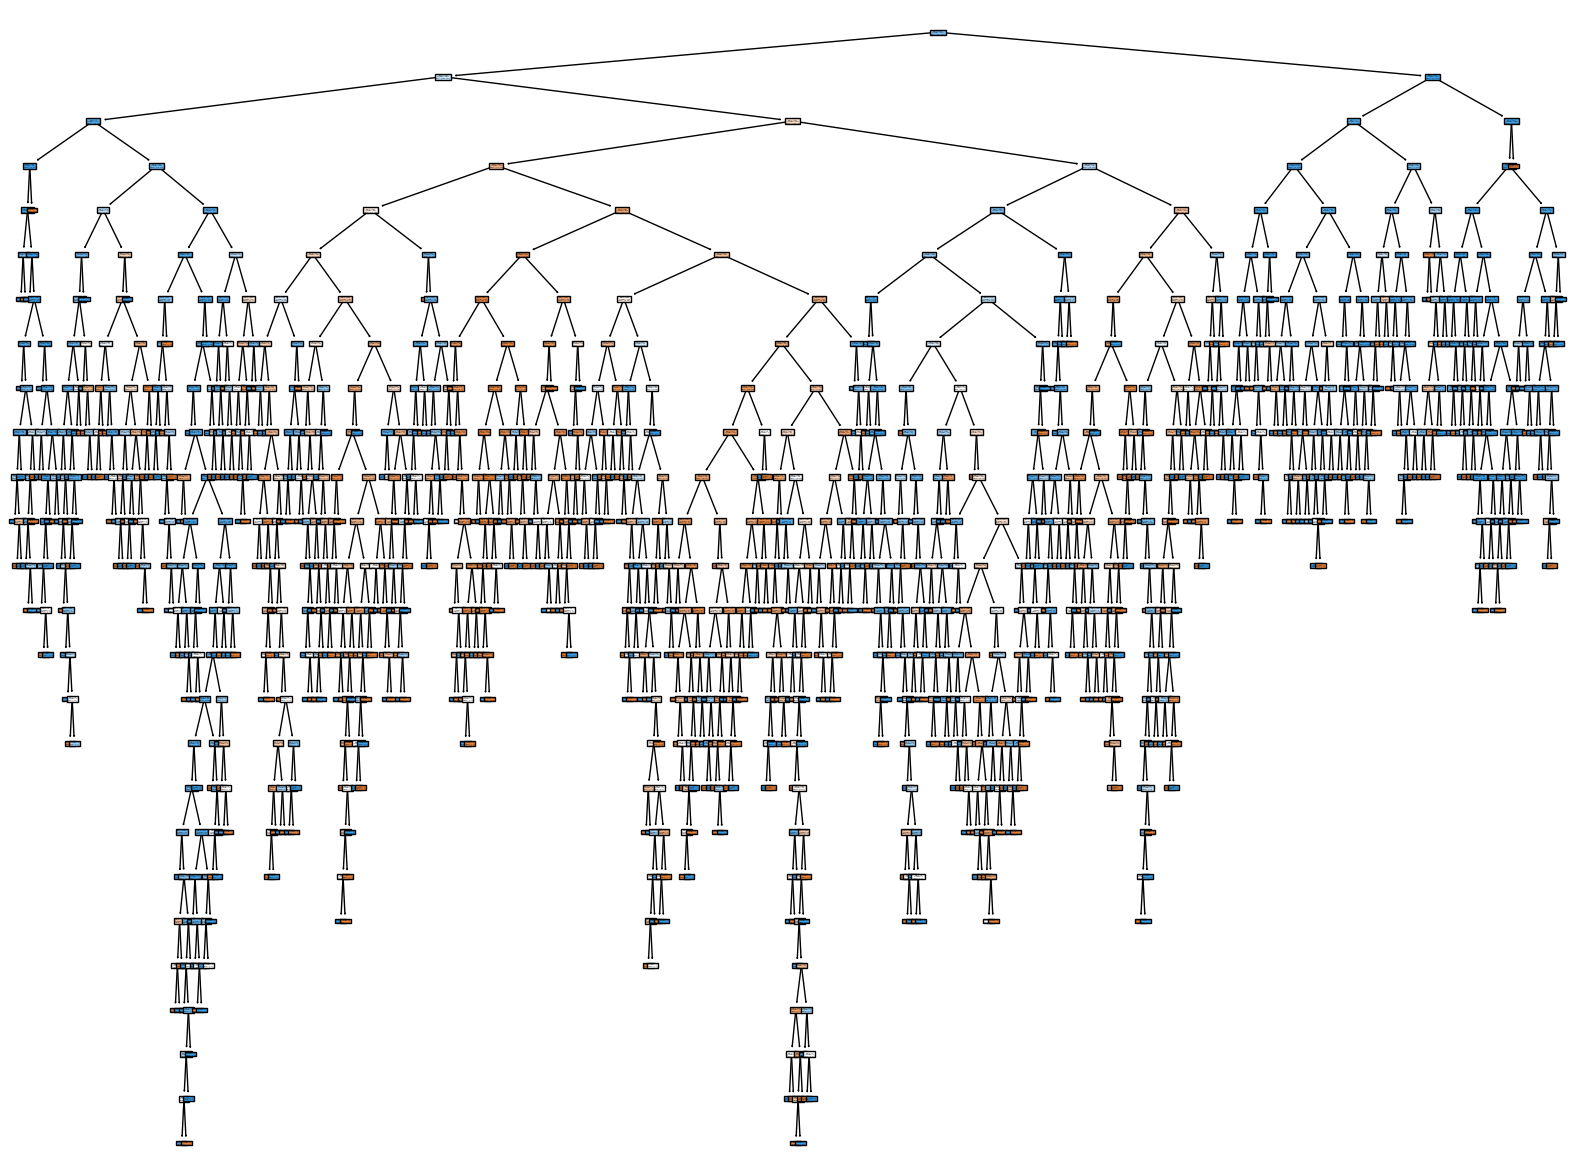

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize= (20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [24]:
# 가지치기 해서 만들기

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8451029440061574
0.8553846153846154


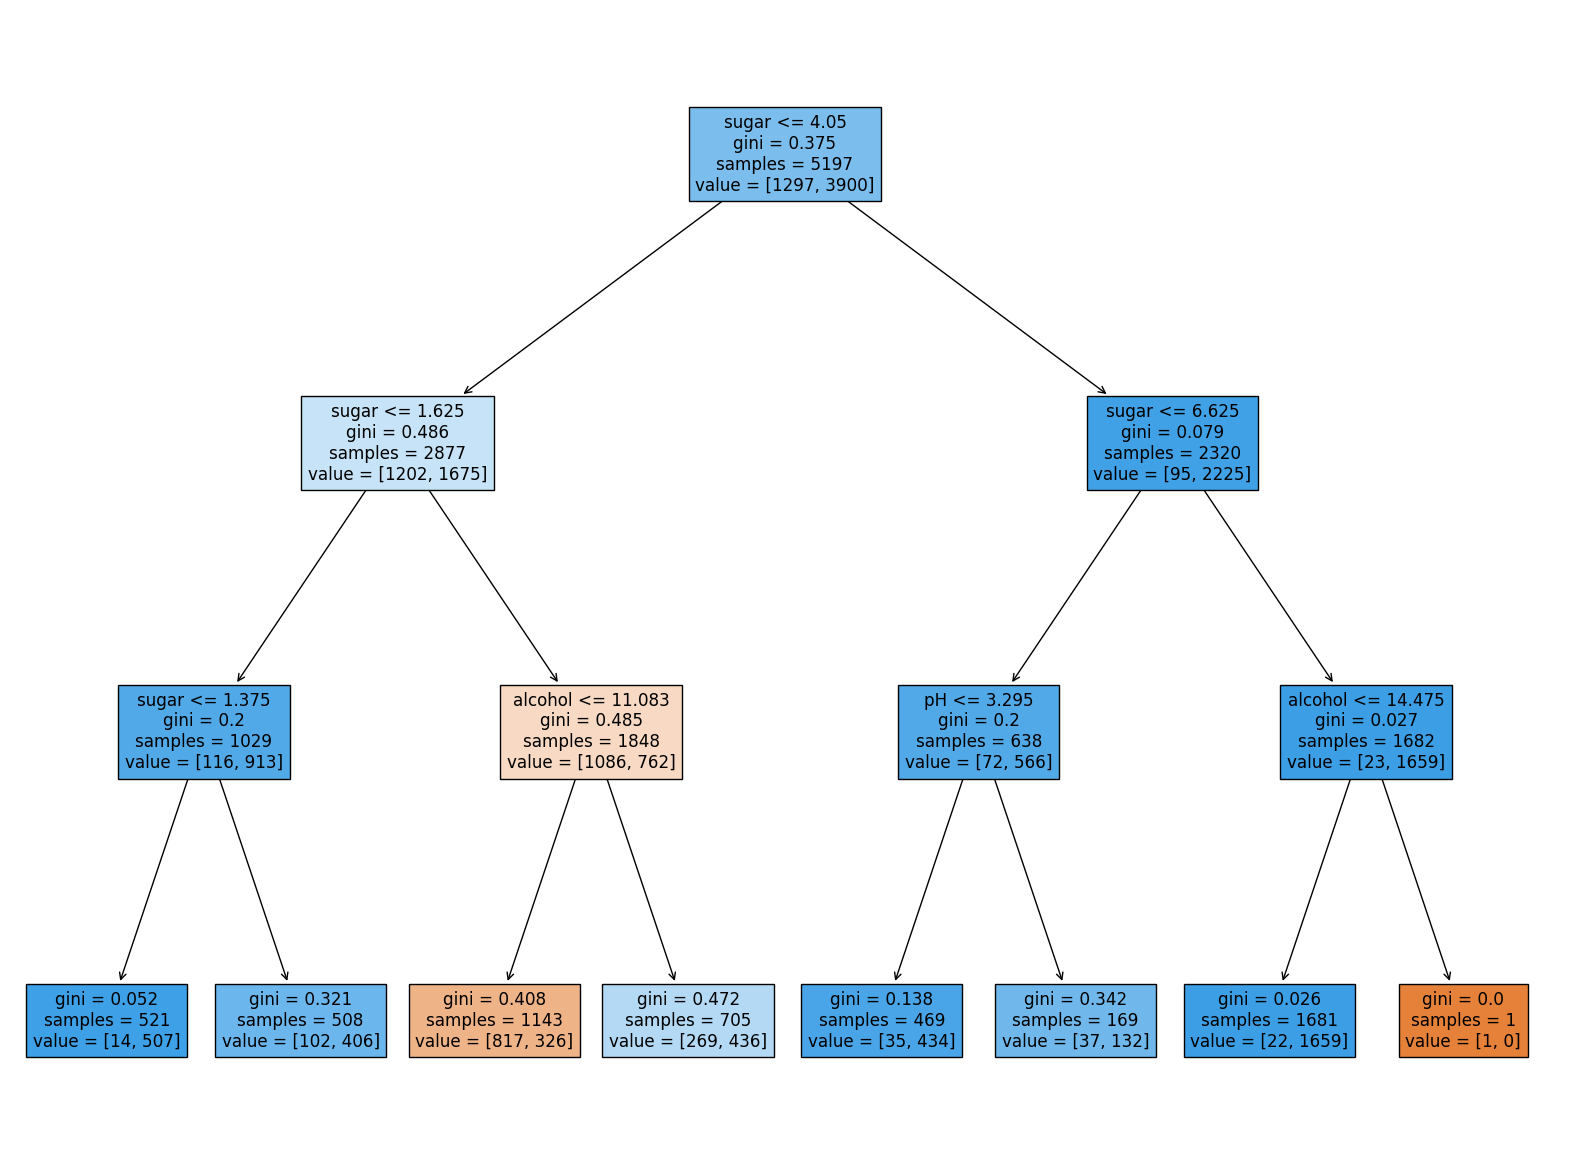

In [25]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
# ** 키워드 핵심 포인트 **

# ** 결정 트리 : 예 / 아니오에 대한 질문을 이어나가면서 정답을 찾아 학습하는 알고리즘
#   비교적 예측하기 쉽고 성능도 뛰어남

# ** 불순도 : 결정 트리가 최적의 질문을 찾기 위한 기준.
#   사이킷런은 지니 불순도와 엔트로피 불순도를 제공

# ** 정보 이득 :  부모 노드와 자식 노드의 불순도 차이
#   결정 트리 알고리즘은 정보 이득이 최대화되도록 학습

# >> 결정 트리는 제한없이 성장하면 훈련 세트에 과대적합 되기 쉬움.

# ** 가지치기 : 결정 트리의 성자을 제한하는 방법.
#   사이킷런의 결정 트리 알고리즘은 여러가지가지치기 매개변수를 제공

# ** 특성 중요도 :  결정 트리에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값.
#   특성 중요도를 계산할 수 있는 것이 결정 트리의 또 다른 큰 장점.

In [ ]:
# ** Pandas **

# ** info() 데이터 프레임의요약된 정보를 출력. 인덱스와 컬럼 타입을 출력하고 
# 널(null) 값이 아닌 값의 개수, 메모리 사용량을 제공.
# verbose 매개변수 기본값 == True를 False로 바꾸면 각 열에 대한 정보를 출력하지 않습니다.

# ** describe()는 데이터 프레임 열의 통계 값을 제공. 
#   수치형일 경우 최소, 최대, 평균, 표준편차와 사분위값 등이 출력.

#   percentiles 매개 변수에서 백분위수를 지정.
#   * 기본값은 [0.25, 0.5, 0.75]

In [ ]:
# # scikit-learn

# ** DecisionTreeClassifier 결정 트리 분류 클래스
#   criterion 매개변수 == 불순도 지정. 
#   - gini 불순도나 entropy 불순도 사용

# * splitter 매개변수는 노드를 분할하는 전략을 선택.
#   기본값 == best / 정보 이득에 최대가 되도록 분할 / random 이면 임의로 노드 분할

# *max_depth는 트리가 성장할 최대 깊이를 지정
#   기본값 == None으로 리프 노드가 순수하거나 min_samples_split보다 샘플 개수가 적을때까지 성장

#   min_samples_split은 노드를 나누기위한 최소 샘플 개수 == 기본값
#   max_features 매개변수는 최적의 분할을 위해 탐색할 특성의 개수 지정.
#     기본값 == None, 모든 특성 사용

# ** plot_tree() 결정 트리 모델 시각화
#   첫 번째 매개변수로 결정 트리 모델 객체를 전달.

#   max_depth 매개변수로 나타낼 트리의 깊이를 지정.
#   기본값 == None // 모든 노드 출력

# ** feature_names 매개변수로 특성의 이름 지정
#   filled 매개변수를 True로 지정하면  타깃값에 따라 노드 안에 색 채움



확인 문제

In [ ]:
1. 다음 중 결정 트리의 불순도에 대해 옳게 설명한 것은

1. 지니 불순도는 부모 노드의 불순도와 자식 노드의 불순도의 차이로 계산
2. 지니 불순도는 클래스의 비율을 제곱하여 모두 더한 다음 1 뺌 >>
3. 엔트로피 불순도는 1에서 가장 큰 클래스 비율을 빼서 계산
4. 엔트로피 불순도는 클래스 비율과 클래스 비율에 밑이 2인 로그를 적용한 값을 곱해서
모두 더한 무 음수로 바꾸어 계산 >>>>>

In [ ]:
2. 결정 트리에서 계산한 특성 중요도가 저장된 순서
 impoortant_feature 같은거

 3. important_features_
 4. feature_importances>>>>>>>>>>>>이게 답

In [ ]:
3. 앞서 결정 트리 예제에서 max_depth를 3으로 지정하여 좌우가 대칭인 트리를 만들었음
사이킷럿 결정 트리 클래스가 제공하는 매개변수 중 
min_impurity_decrease를 사용해 가지치기를 함
어떤 노드의 정보 이득 x (노드의 샘플 수) / (전체 샘플 수) 값이 이 매개변수보다 작으면 
더ㅣ 이상 분할하지 않음. 
이 매개변수의 값을 0.0005로 지정하고 결정 트리 만들기

0.8930152010775447
0.8653846153846154


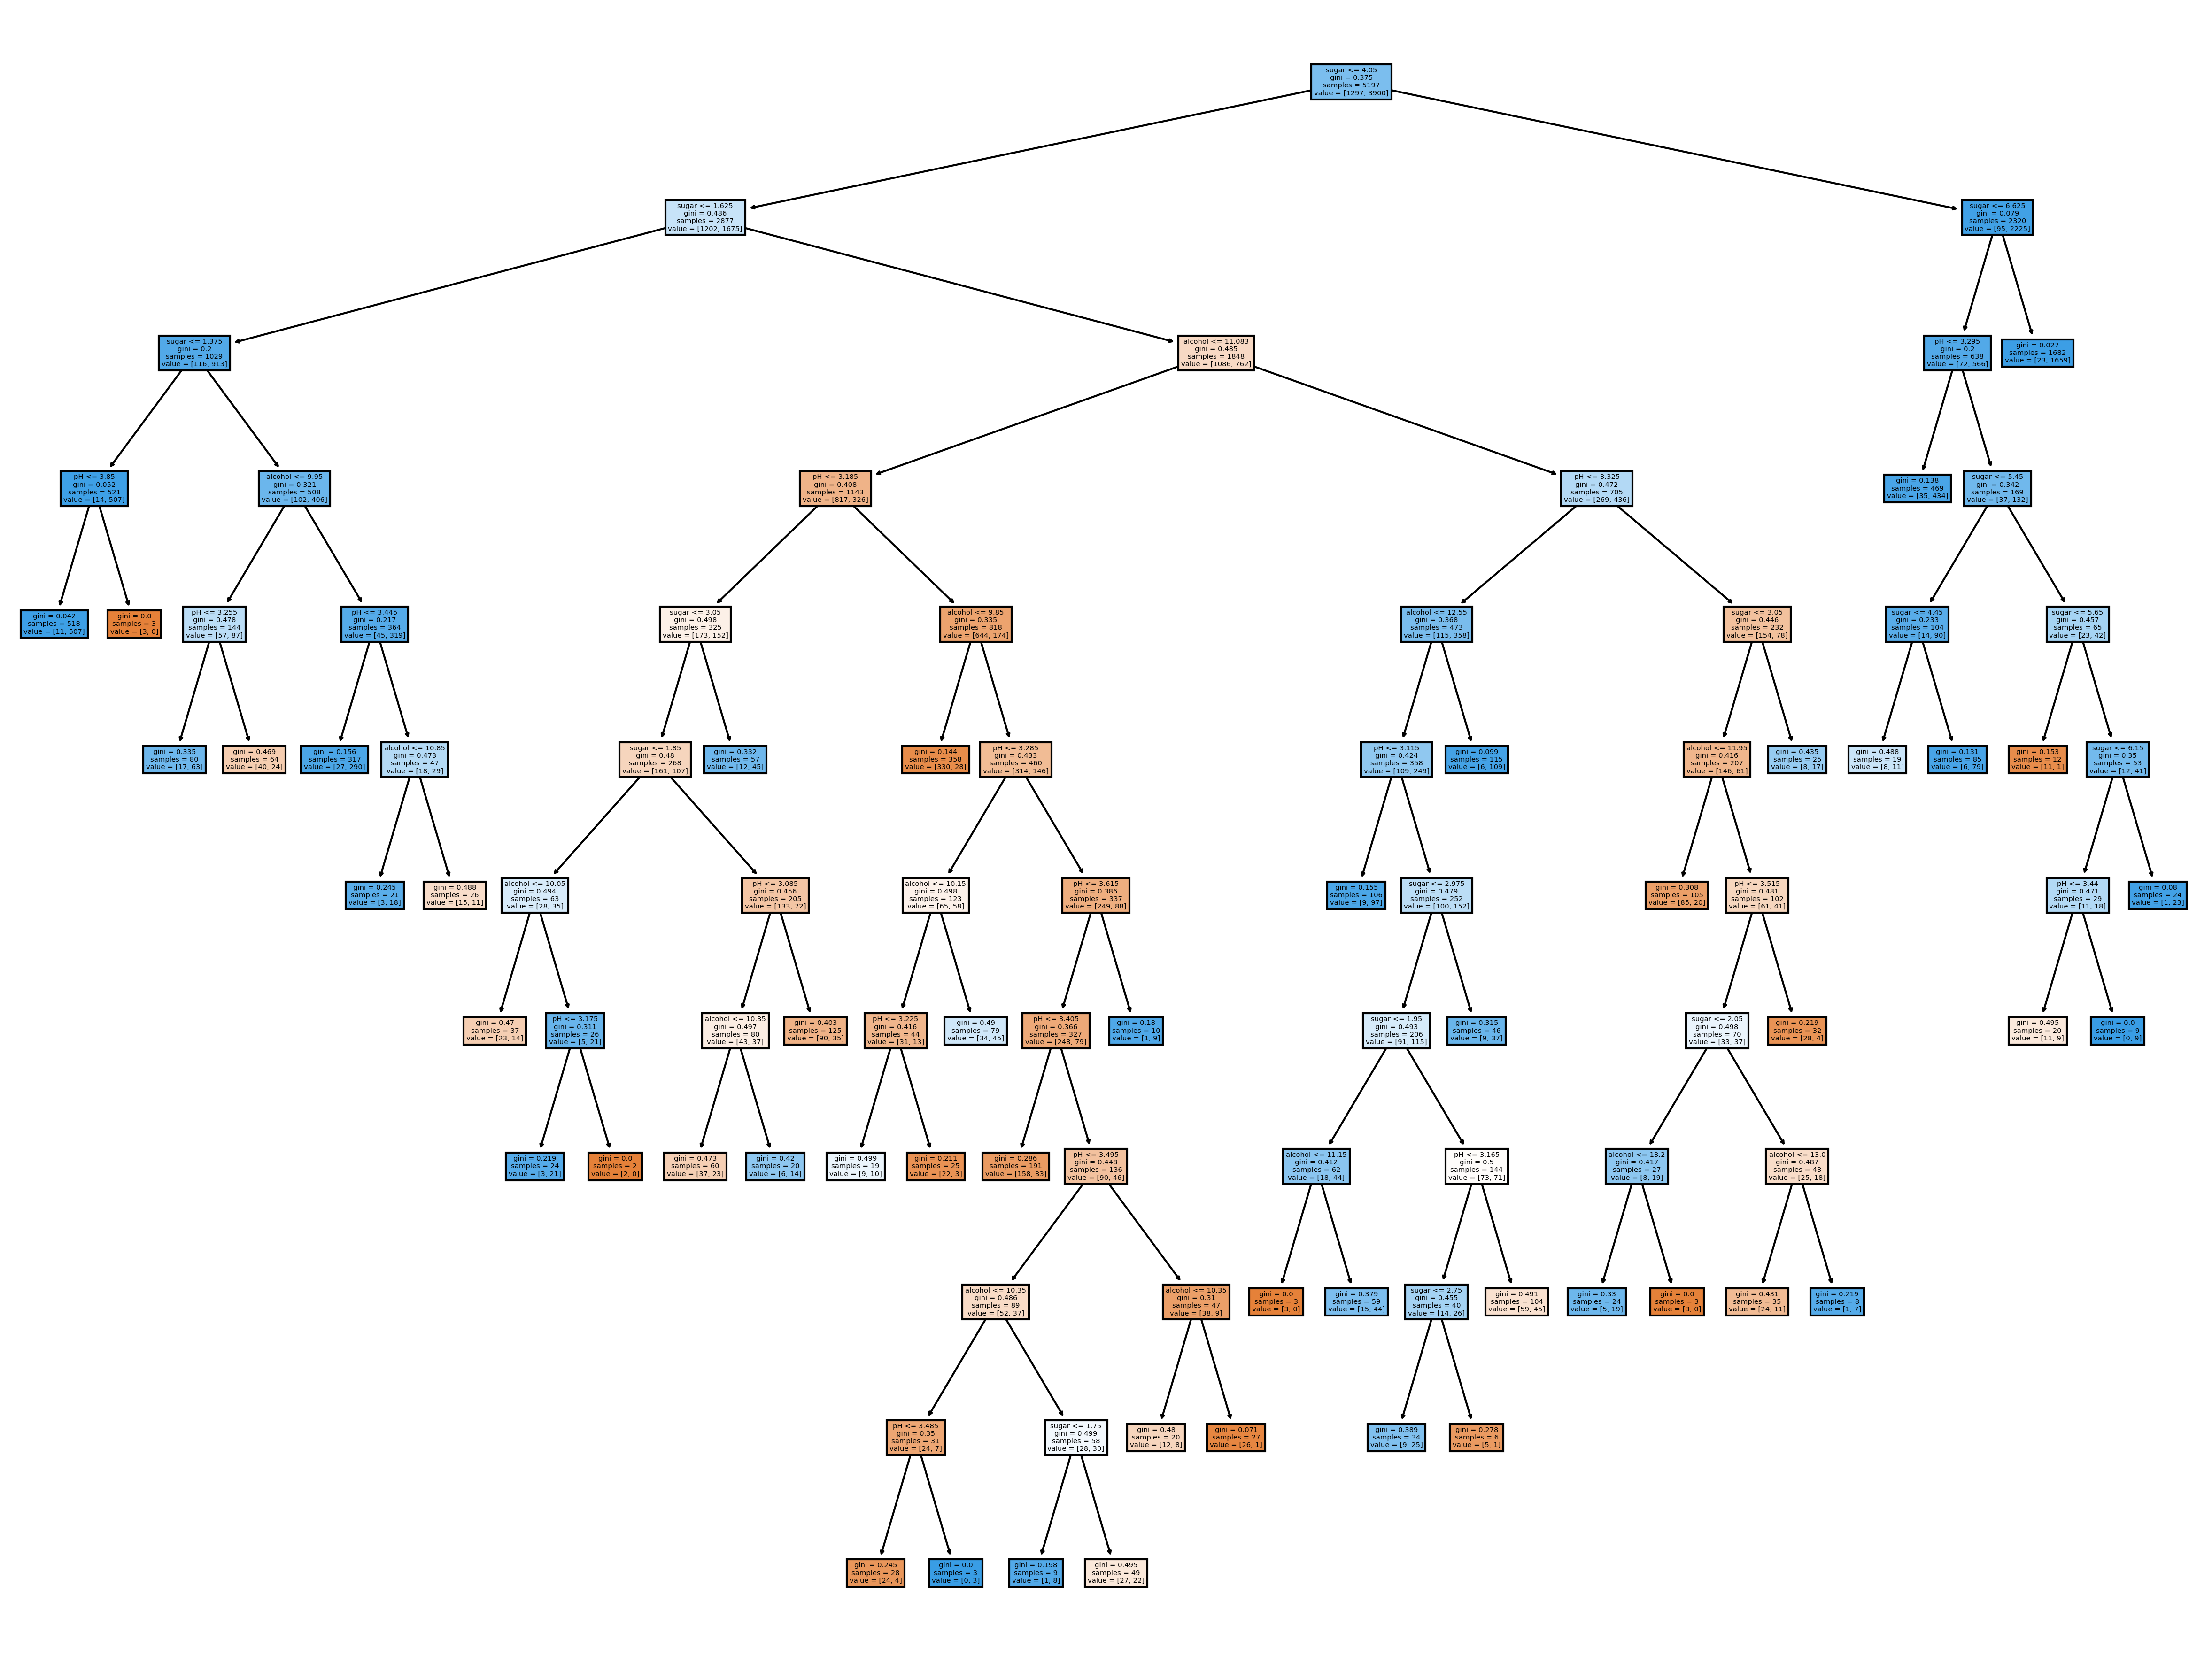

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()